# Image pyramid

## Setup

In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

import tensorflow as tf
from tensorflow.keras.models import load_model

from PIL import Image
import cv2

In [17]:
file_0 = "second_task.png"
file_1 = "third_task.png" 
model_path = "C:/Users/yukic/Documents/ADA/model_2.h5"

label_name = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']) 

input_size = 32
channel = 3
test_size = 160
pred_size = test_size - input_size + 1

## Data

third_task shape (160, 160, 3)


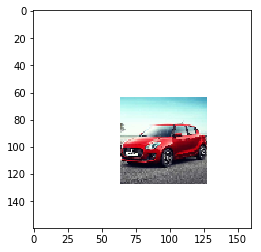

In [20]:
img_0 = Image.open(file_0)
# print(img_0.mode)

img_1 = Image.open(file_1)
# print(img_1.mode)
img_1 = img_1.convert("RGB")

# print("second_task shape", np.array(img_0).shape)
print("third_task shape", np.array(img_1).shape)

# plt.imshow(img_0)
# plt.show()
plt.imshow(img_1)
plt.show()

## Model 

In [15]:
loaded_model = load_model(model_path)
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_v1_14 (B (None, 32, 32, 32)        128       
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
__________

## Preprocess

In [21]:
img_1_ar = np.array(img_1)
print(img_1_ar.shape)
img_1_proc = img_1_ar.reshape((-1, test_size, test_size, channel))
print(img_1_proc.shape)
img_1_proc = img_1_proc.astype("float32")
img_1_proc /= 255

(160, 160, 3)
(1, 160, 160, 3)


## Prediction

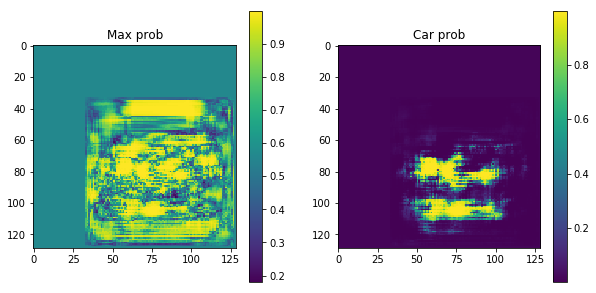

In [22]:
### Max prob
idx_matrix_1 = np.zeros((pred_size, pred_size))
prob_matrix_1 = np.zeros((pred_size, pred_size))

img_proc = img_1_proc

for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        idx_max = np.argmax(pred_tmp)
        prob_max = np.max(pred_tmp)

        # store values
        idx_matrix_1[j, i] = idx_max
        prob_matrix_1[j, i] = prob_max
        
### Car prob
idx_matrix_1_0 = np.zeros((pred_size, pred_size))
prob_matrix_1_0 = np.zeros((pred_size, pred_size))

img_proc = img_1_proc

for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        
        # only car
        idx_car = 1
        prob_car = pred_tmp[0][1]

        # store values
        idx_matrix_1_0[j, i] = idx_car
        prob_matrix_1_0[j, i] = prob_car
        
### Show probabilities
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.imshow(prob_matrix_1)
plt.title("Max prob")
plt.colorbar()

plt.subplot(122)
plt.imshow(prob_matrix_1_0)
plt.title("Car prob")
plt.colorbar()
plt.show()

## Image pyramid

In [24]:
# resize
new_size = test_size // 2
img_1_re = img_1.resize((new_size, new_size))
print("third_task.png resized to", img_1_re.size)

# preprocess
img_1_re_ar = np.array(img_1_re)
img_1_re_proc = img_1_re_ar.reshape((-1, new_size, new_size, channel))
img_1_re_proc = img_1_re_proc.astype("float32")
img_1_re_proc /= 255

# update prediction range
pred_size = new_size - input_size + 1
print("Prediction matrix has {} by {}".format(pred_size, pred_size))

# prediction
idx_matrix_1_1 = np.zeros((pred_size, pred_size))
prob_matrix_1_1 = np.zeros((pred_size, pred_size))
idx_matrix_1_2 = np.zeros((pred_size, pred_size))
prob_matrix_1_2 = np.zeros((pred_size, pred_size))

img_proc = img_1_re_proc
# all classes
for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        idx_max = np.argmax(pred_tmp)
        prob_max = np.max(pred_tmp)

        # store values
        idx_matrix_1_1[j, i] = idx_max
        prob_matrix_1_1[j, i] = prob_max

# only car
for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        
        # only car
        idx_car = 1
        prob_car = pred_tmp[0][1]

        # store values
        idx_matrix_1_2[j, i] = idx_car
        prob_matrix_1_2[j, i] = prob_car

third_task.png resized to (80, 80)
Prediction matrix has 49 by 49


In [25]:
# resize
new_size = test_size // 4
img_1_re = img_1.resize((new_size, new_size))
print("third_task.png resized to", img_1_re.size)

# preprocess
img_1_re_ar = np.array(img_1_re)
img_1_re_proc = img_1_re_ar.reshape((-1, new_size, new_size, channel))
img_1_re_proc = img_1_re_proc.astype("float32")
img_1_re_proc /= 255

# update prediction range
pred_size = new_size - input_size + 1
print("Prediction matrix has {} by {}".format(pred_size, pred_size))

# prediction
idx_matrix_1_3 = np.zeros((pred_size, pred_size))
prob_matrix_1_3 = np.zeros((pred_size, pred_size))
idx_matrix_1_4 = np.zeros((pred_size, pred_size))
prob_matrix_1_4 = np.zeros((pred_size, pred_size))

img_proc = img_1_re_proc
# all classes
for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        idx_max = np.argmax(pred_tmp)
        prob_max = np.max(pred_tmp)

        # store values
        idx_matrix_1_3[j, i] = idx_max
        prob_matrix_1_3[j, i] = prob_max

# only car
for j in range(pred_size):

    for i in range(pred_size):
        tmp = img_proc[:, j:(input_size+j), i:(input_size+i), :]
        pred_tmp = loaded_model.predict(tmp)
        
        # only car
        idx_car = 1
        prob_car = pred_tmp[0][1]

        # store values
        idx_matrix_1_4[j, i] = idx_car
        prob_matrix_1_4[j, i] = prob_car

third_task.png resized to (40, 40)
Prediction matrix has 9 by 9


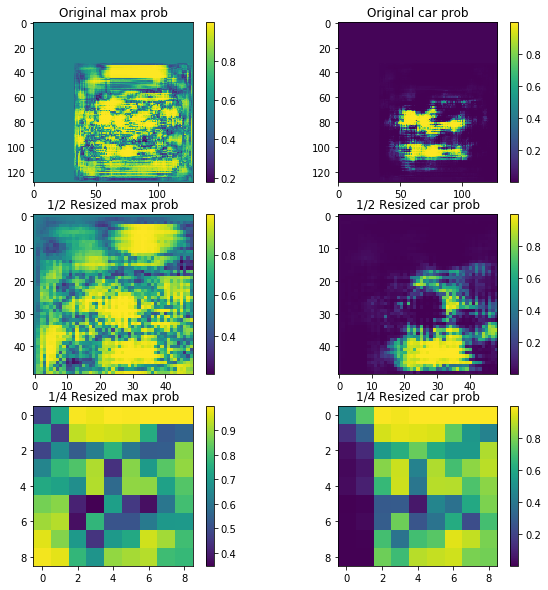

In [26]:
plt.figure(figsize = (10, 10))

plt.subplot(321)
plt.imshow(prob_matrix_1)
plt.title("Original max prob")
plt.colorbar()

plt.subplot(322)
plt.imshow(prob_matrix_1_0)
plt.title("Original car prob")
plt.colorbar()

plt.subplot(323)
plt.imshow(prob_matrix_1_1)
plt.title("1/2 Resized max prob")
plt.colorbar()

plt.subplot(324)
plt.imshow(prob_matrix_1_2)
plt.title("1/2 Resized car prob")
plt.colorbar()

plt.subplot(325)
plt.imshow(prob_matrix_1_3)
plt.title("1/4 Resized max prob")
plt.colorbar()

plt.subplot(326)
plt.imshow(prob_matrix_1_4)
plt.title("1/4 Resized car prob")
plt.colorbar()

plt.show()

## Bounding boxes

In [130]:
print(prob_matrix_1.shape)
print(idx_matrix_1.shape)
print(prob_matrix_1_1.shape)
print(idx_matrix_1_1.shape)
print(prob_matrix_1_3.shape)
print(idx_matrix_1_3.shape)

(129, 129)
(129, 129)
(49, 49)
(49, 49)
(9, 9)
(9, 9)


In [131]:
prob_array_x1 = prob_matrix_1.flatten(order = "C")

length = len(prob_array_x1)
location_x1 = []

for i in range(129):
    for j in range(129):
        tmp = [i, j, (input_size + i), (input_size + j)]
        location_x1.append(tmp)

In [133]:
cutoff = 0.9999

# number of bounding boxes with prespecified cutoff
print(sum(prob_array_x1 > cutoff))

confident_location_x1 = np.array(location_x1)[prob_array_x1 > cutoff]
print(confident_location_x1)

14
[[ 41  97  73 129]
 [ 42  97  74 129]
 [ 43  97  75 129]
 [ 43  98  75 130]
 [ 43 100  75 132]
 [ 76  59 108  91]
 [ 76  61 108  93]
 [ 77  61 109  93]
 [ 78  60 110  92]
 [ 78  61 110  93]
 [ 79  68 111 100]
 [ 80  59 112  91]
 [ 81  91 113 123]
 [105  60 137  92]]


Number of bounding boxes: 14


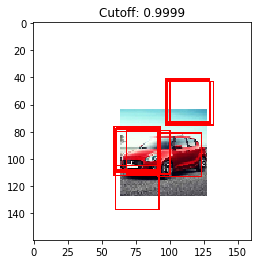

In [134]:
print("Number of bounding boxes:", sum(prob_array_x1 > cutoff))

tmp = np.copy(np.array(img_1))

for pt1_1, pt1_2, pt2_1, pt2_2 in confident_location_x1:
    tmp = cv2.rectangle(img = tmp, pt1 = (pt1_2, pt1_1), pt2 = (pt2_2, pt2_1), color = (255, 0, 0), thickness = 1)
    
plt.imshow(tmp)
plt.title("Cutoff: {}".format(cutoff))
plt.show()

## Box suppression

In [135]:
n = confident_location_x1.shape[0]

loc_1 = []
for i in range(n):
    loc_1.append(confident_location_x1[i][0])
    
loc_2 = []
for i in range(n):
    loc_2.append(confident_location_x1[i][1])
    
loc_3 = []
for i in range(n):
    loc_3.append(confident_location_x1[i][2])
    
loc_4 = []
for i in range(n):
    loc_4.append(confident_location_x1[i][3])
    
loc_all = []

### taking mean
# loc_all.append(int(np.mean(loc_1)))
# loc_all.append(int(np.mean(loc_2)))
# loc_all.append(int(np.mean(loc_3)))
# loc_all.append(int(np.mean(loc_4)))

### min max method
loc_all.append(np.min(loc_1))
loc_all.append(np.min(loc_2))
loc_all.append(np.max(loc_3))
loc_all.append(np.max(loc_4))

print(loc_all)

[41, 59, 137, 132]


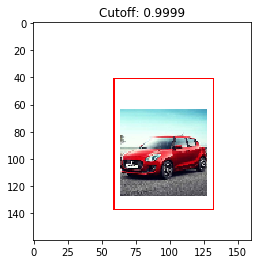

In [136]:
tmp_1 = np.copy(np.array(img_1))

pt1_1, pt1_2, pt2_1, pt2_2 = loc_all
tmp_1 = cv2.rectangle(img = tmp_1, pt1 = (pt1_2, pt1_1), pt2 = (pt2_2, pt2_1), color = (255, 0, 0), thickness = 1)
    
plt.imshow(tmp_1)
plt.title("Cutoff: {}".format(cutoff))
plt.show()

## Labeling

In [137]:
idx_array_x1 = idx_matrix_1.flatten(order = "C")
confident_idx_x1 = idx_array_x1[prob_array_x1 > cutoff]
label_index = int(Counter(confident_idx_x1).most_common(1)[0][0])
label_pred = label_name[label_index]

print(confident_idx_x1)
print(Counter(confident_idx_x1))
print(label_index)
print(label_pred)

[8. 8. 8. 8. 8. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Counter({1.0: 9, 8.0: 5})
1
automobile


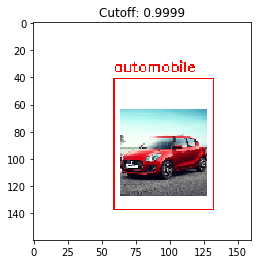

In [138]:
tmp_1 = np.copy(np.array(img_1))

pt1_1, pt1_2, pt2_1, pt2_2 = loc_all
tmp_1 = cv2.rectangle(img = tmp_1, pt1 = (pt1_2, pt1_1), pt2 = (pt2_2, pt2_1), color = (255, 0, 0), thickness = 1)
tmp_1 = cv2.putText(img = tmp_1, 
                    text = label_pred, 
                    org = (pt1_2, pt1_1 - 5), 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
                    fontScale = 0.35, 
                    color = (255, 0, 0))
    
plt.imshow(tmp_1)
plt.title("Cutoff: {}".format(cutoff))
plt.show()

## x2: 1/2 image

In [241]:
prob_array_x2 = prob_matrix_1_1.flatten(order = "C")

location_x2 = []
n_prob = prob_matrix_1_1.shape[0]
ratio = (test_size - input_size*2 + 1) / n_prob

for i in range(n_prob):
    for j in range(n_prob):
        tmp = [int(np.round(i*ratio, decimals = 0)), 
               int(np.round(j*ratio, decimals = 0)), 
               int(input_size*2 + np.round(i*ratio, decimals = 0)), 
               int(input_size*2 + np.round(j*ratio, decimals = 0))]
        
        # adjust edges
        tmp = [160 if point > 160 else point for point in tmp]
        location_x2.append(tmp)
        
# number of bounding boxes with prespecified cutoff
print(sum(prob_array_x2 > cutoff))

confident_location_x2 = np.array(location_x2)[prob_array_x2 > cutoff]
print(confident_location_x2)

### label
idx_array_x2 = idx_matrix_1_1.flatten(order = "C")
confident_idx_x2 = idx_array_x2[prob_array_x2 > cutoff]
label_index_x2 = int(Counter(confident_idx_x2).most_common(1)[0][0])
label_pred_x2 = label_name[label_index_x2]
print(confident_idx_x2)
print(label_index_x2)
print(label_pred_x2)

6
[[ 51  51 115 115]
 [ 53  55 117 119]
 [ 57  51 121 115]
 [ 57  55 121 119]
 [ 85  57 149 121]
 [ 85  67 149 131]]
[9. 9. 9. 9. 1. 1.]
9
truck


Number of bounding boxes: 6


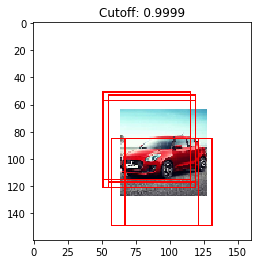

In [242]:
print("Number of bounding boxes:", sum(prob_array_x2 > cutoff))

tmp_x2 = np.copy(np.array(img_1))

for pt1_1, pt1_2, pt2_1, pt2_2 in confident_location_x2:
    tmp_x2 = cv2.rectangle(img = tmp_x2, pt1 = (pt1_2, pt1_1), pt2 = (pt2_2, pt2_1), color = (255, 0, 0), thickness = 1)
    
plt.imshow(tmp_x2)
plt.title("Cutoff: {}".format(cutoff))
plt.show()

## x4: 1/4 image

In [243]:
prob_array_x4 = prob_matrix_1_3.flatten(order = "C")

location_x4 = []
n_prob = prob_matrix_1_3.shape[0]
ratio = 129 / 9

for i in range(n_prob):
    for j in range(n_prob):
        tmp = [int(i*ratio), int(j*ratio), (input_size + int(i*ratio)), (input_size + int(j*ratio))]
        
        # adjust edges
        tmp = [160 if point > 160 else point for point in tmp]
        location_x4.append(tmp)
        
# number of bounding boxes with prespecified cutoff
print(sum(prob_array_x4 > cutoff))

confident_location_x4 = np.array(location_x4)[prob_array_x4 > cutoff]
print(confident_location_x4)

max_prob_x4 = np.max(prob_array_x4)
print("No box from x4 because maximum probability is", max_prob_x4)

0
[]
No box from x4 because maximum probability is 0.9973426461219788


## Merge image pyramid

In [244]:
print(confident_location_x1, len(confident_location_x1))
print(confident_location_x2, len(confident_location_x2))
print(confident_idx_x1)
print(confident_idx_x2)

[[ 41  97  73 129]
 [ 42  97  74 129]
 [ 43  97  75 129]
 [ 43  98  75 130]
 [ 43 100  75 132]
 [ 76  59 108  91]
 [ 76  61 108  93]
 [ 77  61 109  93]
 [ 78  60 110  92]
 [ 78  61 110  93]
 [ 79  68 111 100]
 [ 80  59 112  91]
 [ 81  91 113 123]
 [105  60 137  92]] 14
[[ 51  51 115 115]
 [ 53  55 117 119]
 [ 57  51 121 115]
 [ 57  55 121 119]
 [ 85  57 149 121]
 [ 85  67 149 131]] 6
[8. 8. 8. 8. 8. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[9. 9. 9. 9. 1. 1.]


In [245]:
joined_confident_location = [*confident_location_x1, *confident_location_x2]
print(len(joined_confident_location), joined_confident_location)

joined_index = [*confident_idx_x1, *confident_idx_x2]
print(joined_index)

20 [array([ 41,  97,  73, 129]), array([ 42,  97,  74, 129]), array([ 43,  97,  75, 129]), array([ 43,  98,  75, 130]), array([ 43, 100,  75, 132]), array([ 76,  59, 108,  91]), array([ 76,  61, 108,  93]), array([ 77,  61, 109,  93]), array([ 78,  60, 110,  92]), array([ 78,  61, 110,  93]), array([ 79,  68, 111, 100]), array([ 80,  59, 112,  91]), array([ 81,  91, 113, 123]), array([105,  60, 137,  92]), array([ 51,  51, 115, 115]), array([ 53,  55, 117, 119]), array([ 57,  51, 121, 115]), array([ 57,  55, 121, 119]), array([ 85,  57, 149, 121]), array([ 85,  67, 149, 131])]
[8.0, 8.0, 8.0, 8.0, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 9.0, 9.0, 9.0, 9.0, 1.0, 1.0]


## Box suppression with image pyramid

In [246]:
n = len(joined_confident_location)

loc_1 = []
for i in range(n):
    loc_1.append(joined_confident_location[i][0])
    
loc_2 = []
for i in range(n):
    loc_2.append(joined_confident_location[i][1])
    
loc_3 = []
for i in range(n):
    loc_3.append(joined_confident_location[i][2])
    
loc_4 = []
for i in range(n):
    loc_4.append(joined_confident_location[i][3])
    
loc_all = []

### taking mean
loc_all.append(int(np.mean(loc_1)))
loc_all.append(int(np.mean(loc_2)))
loc_all.append(int(np.mean(loc_3)))
loc_all.append(int(np.mean(loc_4)))

### min max method
# loc_all.append(np.min(loc_1))
# loc_all.append(np.min(loc_2))
# loc_all.append(np.max(loc_3))
# loc_all.append(np.max(loc_4))

### median
# loc_all.append(int(np.median(loc_1)))
# loc_all.append(int(np.median(loc_2)))
# loc_all.append(int(np.median(loc_3)))
# loc_all.append(int(np.median(loc_4)))

print(loc_all)

[66, 70, 108, 111]


In [247]:
### label
label_index = int(Counter(joined_index).most_common(1)[0][0])
label_pred = label_name[label_index]
print(Counter(joined_index))
print(label_index)
print(label_pred)

Counter({1.0: 11, 8.0: 5, 9.0: 4})
1
automobile


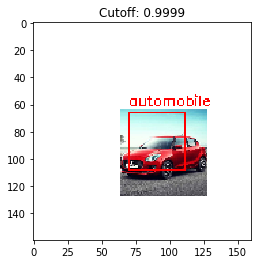

In [248]:
tmp_1 = np.copy(np.array(img_1))

pt1_1, pt1_2, pt2_1, pt2_2 = loc_all
tmp_1 = cv2.rectangle(img = tmp_1, pt1 = (pt1_2, pt1_1), pt2 = (pt2_2, pt2_1), color = (255, 0, 0), thickness = 1)
tmp_1 = cv2.putText(img = tmp_1, 
                    text = label_pred, 
                    org = (pt1_2, pt1_1 - 5), 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
                    fontScale = 0.35, 
                    color = (255, 0, 0))

plt.imshow(tmp_1)
plt.title("Cutoff: {}".format(cutoff))
plt.show()

Intuition is that all the pyramid location predictions put back to the original images, and take majority vote over the all pyramid index which are above cutoff.